# Gradient descent example

Consider the quadratic function $f(x,y) = x^2 + 3y^2$ having a single minimum at the origin $(0,0)$.

The gradient is given by $\nabla f(x,y) = (2x,6y)$.

Gradient descent: starting from an initial value $(x_0,y_0)$ consider the sequence $$(x_{k+1},y_{k+1}) = (x_k,y_k) - s \nabla f(x_k,y_k),$$
that is $$x_{k+1} = (1-2s)x_k,\, y_{k+1} = (1-6s)y_k.$$

(Exact line search) We look for the optimal step size (learning rate) $s>0$ by minimizing the function
$$
\varphi(s) = f(x_{k+1},y_{k+1}) = (1-2s)^2 x^2_k + 3(1-6s)^2 y^2_k \to \min.
$$
We want 
$$
\varphi'(s) = 0 \text{ with }
\varphi'(s) = -4(1-2s) x^2_k -36(1-6s) y^2_k
$$
and we obtain the optimal step size
$$
s = \frac{x^2_k + 9 y^2_k}{2 x^2_k + 54 y^2_k}.
$$

In [55]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
    return x**2 + 3*(y**2)

def step(x,y):
    return (x**2 + 9*(y**2))/(2*(x**2) + 54*(y**2))

def next_iteration(x,y,s):
    return [(1-2*s)*x, (1-6*s)*y]

iterations = 10
x = np.zeros(iterations+2)
y = np.zeros(iterations+2)

# initial value
x[0] = 3
y[0] = 1

# gradient descent
k = 0
s = step(x[k], y[k])
[x[k+1], y[k+1]] = next_iteration(x[k], y[k], s)

while k<iterations:
    print(k, x[k], y[k], f(x[k], y[k]))
    k+=1
    s = step(x[k], y[k])
    [x[k+1], y[k+1]] = next_iteration(x[k], y[k], s)

0 3.0 1.0 12.0
1 1.5 -0.5 3.0
2 0.75 0.25 0.75
3 0.375 -0.125 0.1875
4 0.1875 0.0625 0.046875
5 0.09375 -0.03125 0.01171875
6 0.046875 0.015625 0.0029296875
7 0.0234375 -0.0078125 0.000732421875
8 0.01171875 0.00390625 0.00018310546875
9 0.005859375 -0.001953125 4.57763671875e-05


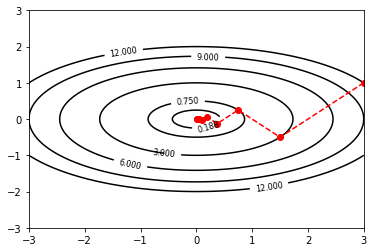

In [54]:
# create meshgrid for contour plot
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = f(X,Y)

# define the contour levels
nlevels = 4
levels = np.zeros(nlevels+2)
for k in range(nlevels):
    levels[k] = f(x[k],y[k])
levels[nlevels], levels[nlevels+1]=[6,9]
levels = np.sort(levels)

# plot the contour lines
contours = plt.contour(X, Y, Z, levels, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

# plot the gradient descent iterations
plt.plot(x[:iterations],y[:iterations],'r--o')

plt.show()